In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Ahmed Kamel\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('Bike Sales.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [4]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [5]:
df.duplicated().sum()

1000

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(112036, 18)

In [8]:
df.head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


In [9]:
df['Country'].value_counts()

United States     38840
Australia         23736
Canada            14027
United Kingdom    13486
Germany           11027
France            10920
Name: Country, dtype: int64

In [10]:
df['State'].value_counts()

California             22220
British Columbia       13965
England                13486
Washington             11168
New South Wales        10312
Victoria                5973
Oregon                  5246
Queensland              5177
Saarland                2754
Nordrhein-Westfalen     2473
Hessen                  2370
Seine (Paris)           2315
Hamburg                 1816
Seine Saint Denis       1676
Nord                    1655
South Australia         1551
Bayern                  1417
Hauts de Seine          1074
Essonne                  985
Yveline                  943
Tasmania                 723
Seine et Marne           390
Moselle                  384
Loiret                   380
Val d'Oise               264
Garonne (Haute)          207
Brandenburg              197
Val de Marne             157
Charente-Maritime        147
Somme                    133
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Ohio          

In [11]:
df[['Country','State']]

,Country,State
0,Canada,British Columbia
1,Canada,British Columbia
2,Australia,New South Wales
3,Australia,New South Wales
4,Australia,New South Wales
...,...,...
113031,United Kingdom,England
113032,Australia,Queensland
113033,Australia,Queensland
113034,France,Seine (Paris)


In [12]:
df['Product_Category'].value_counts()

Accessories    69312
Bikes          25794
Clothing       16930
Name: Product_Category, dtype: int64

In [13]:
df['Sub_Category'].value_counts()

Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Helmets              12150
Mountain Bikes        8803
Jerseys               6006
Caps                  4358
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            455
Name: Sub_Category, dtype: int64

In [14]:
df['Product'].value_counts()

Water Bottle - 30 oz.      10641
Patch Kit/8 Patches        10256
Mountain Tire Tube          6688
AWC Logo Cap                4358
Sport-100 Helmet, Red       4218
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

In [15]:
df[['Product_Category','Sub_Category']]

,Product_Category,Sub_Category
0,Accessories,Bike Racks
1,Accessories,Bike Racks
2,Accessories,Bike Racks
3,Accessories,Bike Racks
4,Accessories,Bike Racks
...,...,...
113031,Clothing,Vests
113032,Clothing,Vests
113033,Clothing,Vests
113034,Clothing,Vests


In [16]:
df[['Sub_Category','Product']]

,Sub_Category,Product
0,Bike Racks,Hitch Rack - 4-Bike
1,Bike Racks,Hitch Rack - 4-Bike
2,Bike Racks,Hitch Rack - 4-Bike
3,Bike Racks,Hitch Rack - 4-Bike
4,Bike Racks,Hitch Rack - 4-Bike
...,...,...
113031,Vests,"Classic Vest, S"
113032,Vests,"Classic Vest, M"
113033,Vests,"Classic Vest, M"
113034,Vests,"Classic Vest, L"


In [17]:
df[['Product_Category','Sub_Category','Product']]

,Product_Category,Sub_Category,Product
0,Accessories,Bike Racks,Hitch Rack - 4-Bike
1,Accessories,Bike Racks,Hitch Rack - 4-Bike
2,Accessories,Bike Racks,Hitch Rack - 4-Bike
3,Accessories,Bike Racks,Hitch Rack - 4-Bike
4,Accessories,Bike Racks,Hitch Rack - 4-Bike
...,...,...,...
113031,Clothing,Vests,"Classic Vest, S"
113032,Clothing,Vests,"Classic Vest, M"
113033,Clothing,Vests,"Classic Vest, M"
113034,Clothing,Vests,"Classic Vest, L"


In [18]:
df.head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


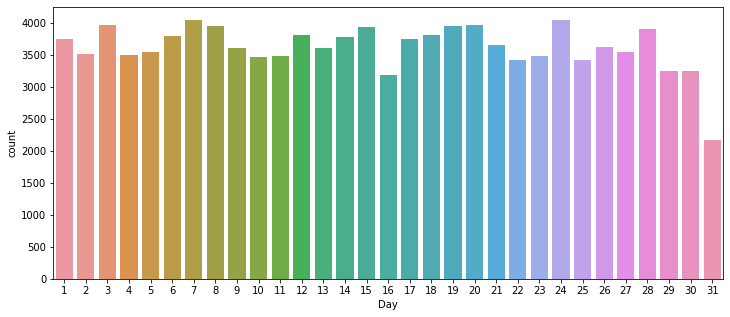

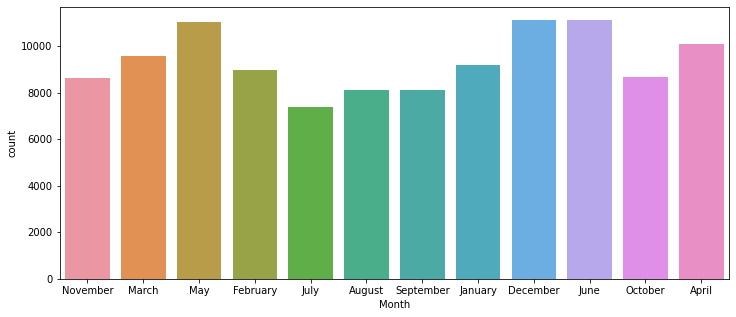

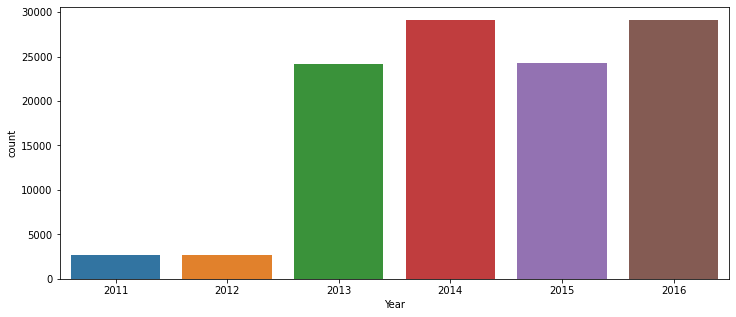

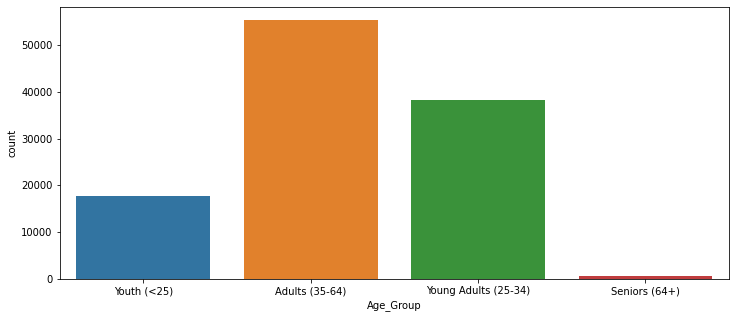

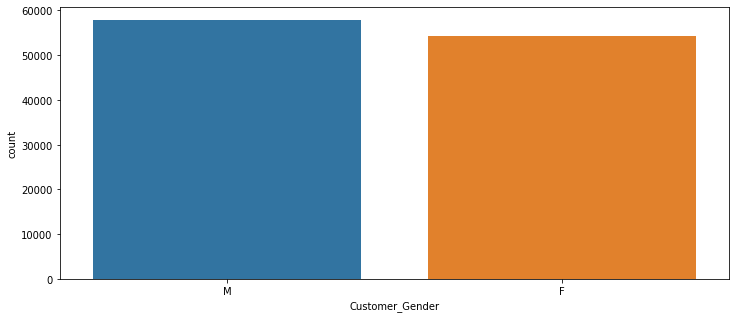

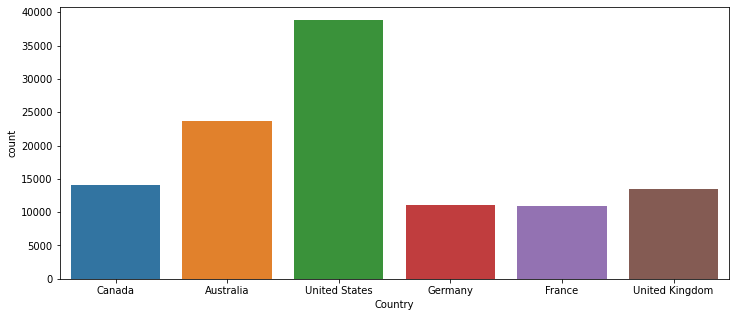

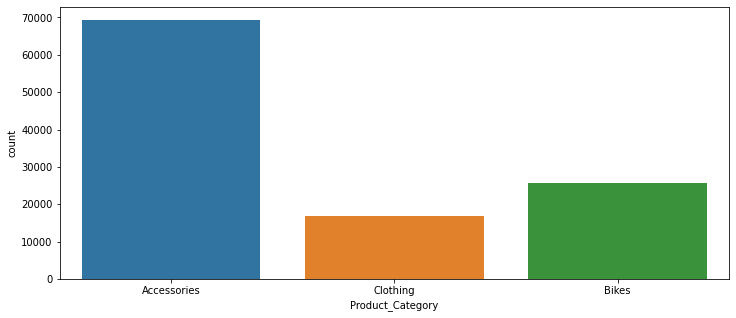

In [19]:
for col in df[['Day','Month','Year','Age_Group','Customer_Gender','Country','Product_Category']]:
    plt.figure(figsize=(12,5))
    sns.countplot(df[col])
    plt.show()

In [20]:
visualization = df[['Day','Month','Year','Age_Group','Customer_Gender','Country']]
visualization

,Day,Month,Year,Age_Group,Customer_Gender,Country
0,26,November,2013,Youth (<25),M,Canada
1,26,November,2015,Youth (<25),M,Canada
2,23,March,2014,Adults (35-64),M,Australia
3,23,March,2016,Adults (35-64),M,Australia
4,15,May,2014,Adults (35-64),F,Australia
...,...,...,...,...,...,...
113031,12,April,2016,Adults (35-64),M,United Kingdom
113032,2,April,2014,Youth (<25),M,Australia
113033,2,April,2016,Youth (<25),M,Australia
113034,4,March,2014,Adults (35-64),F,France


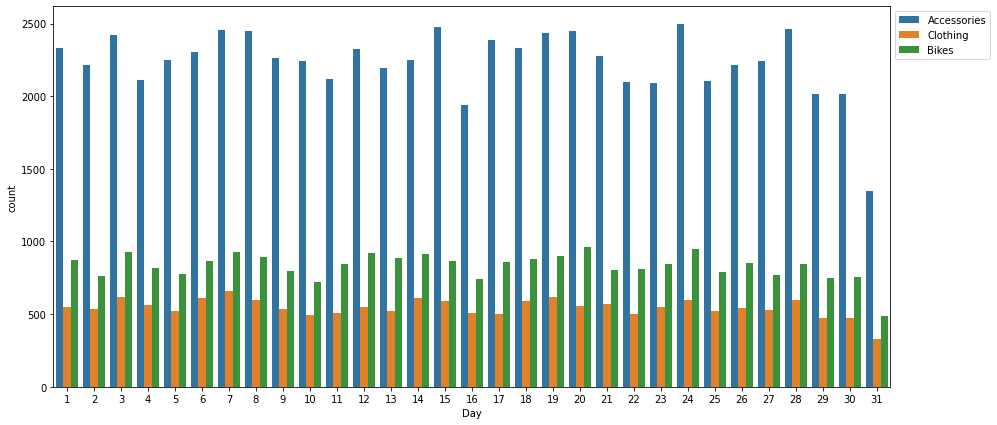

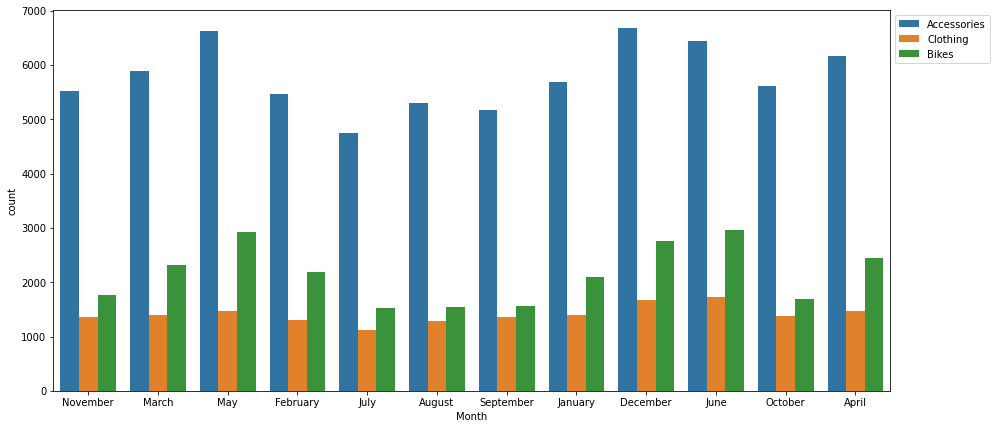

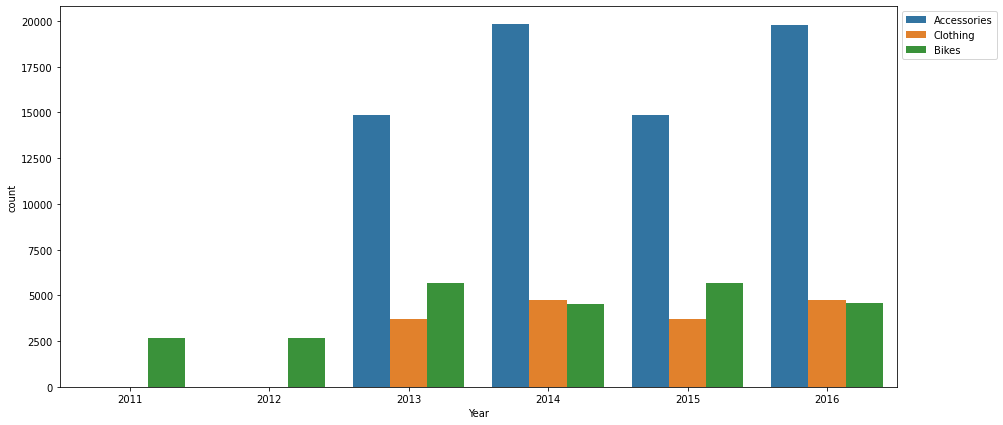

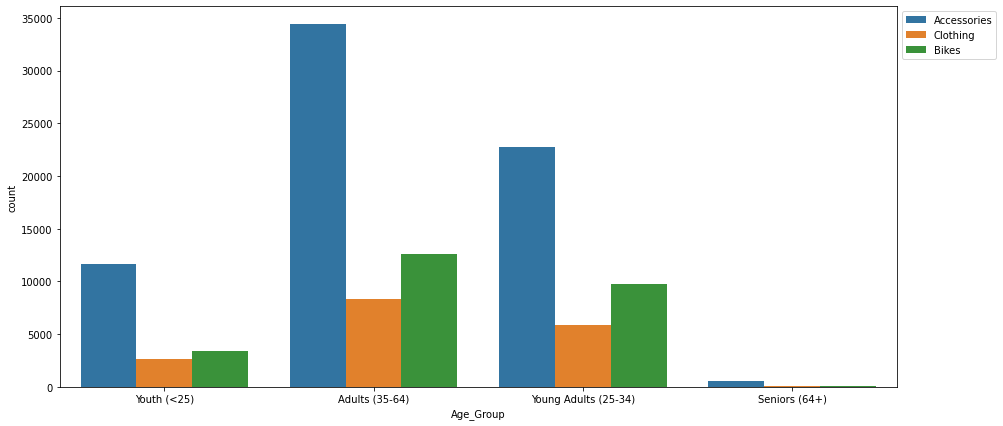

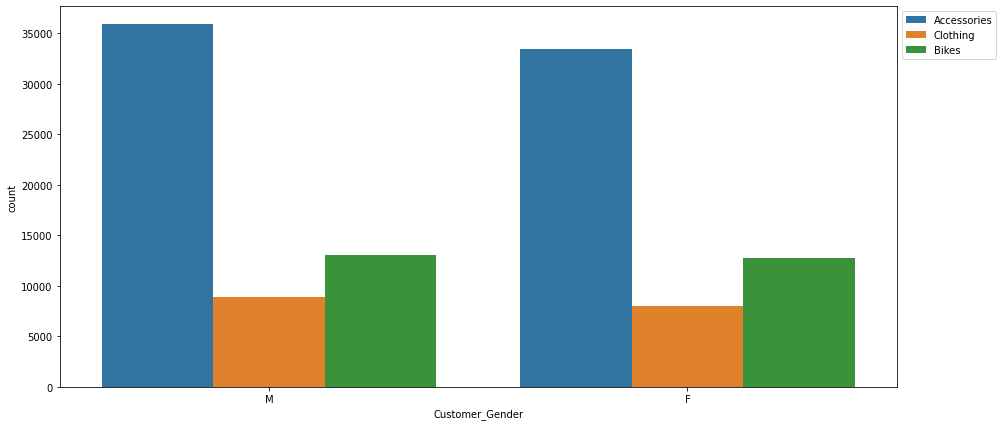

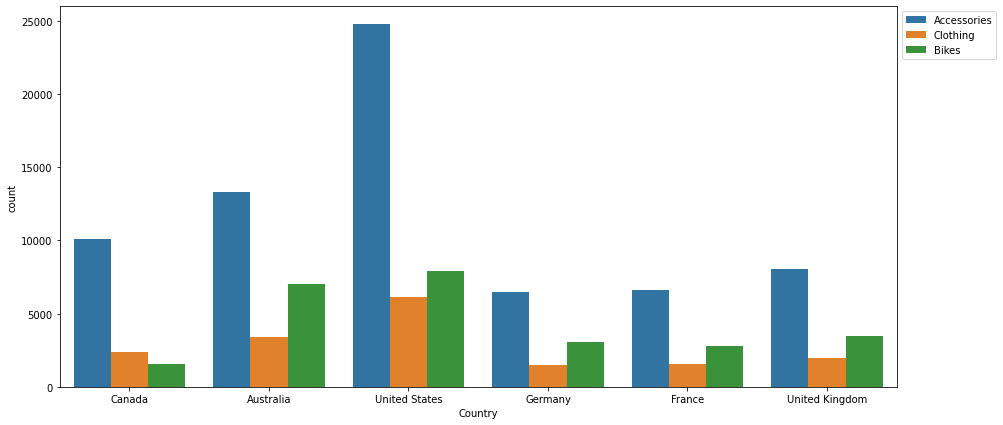

In [21]:
for col in visualization:
    plt.figure(figsize=(15,7))
    sns.countplot(x=df[col], hue=df['Product_Category'])
    plt.legend(bbox_to_anchor=(1,1),loc=2)
    plt.show()

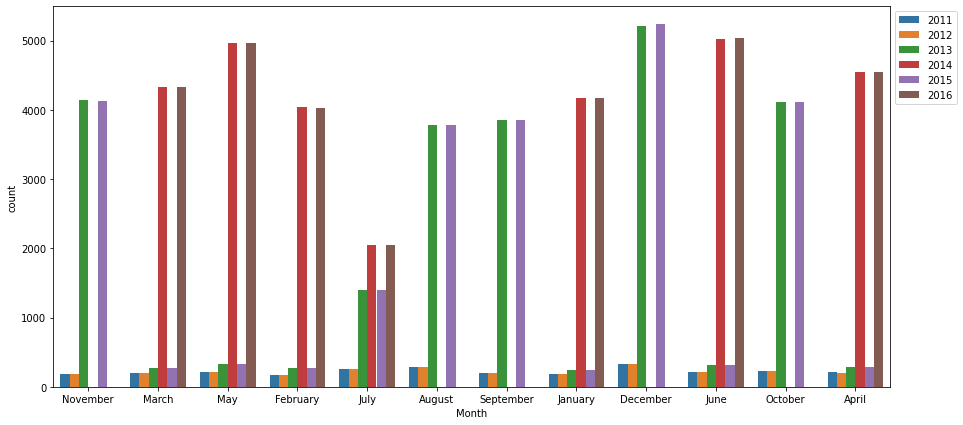

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(df['Month'],hue=df['Year'])
plt.legend(bbox_to_anchor=(1,1),loc=2)

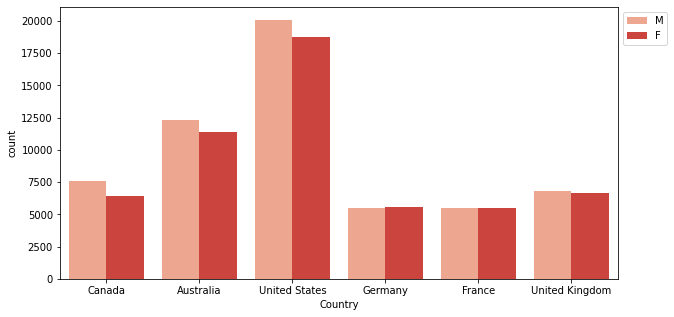

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df['Country'],hue=df['Customer_Gender'], palette='Reds')
plt.legend(bbox_to_anchor=(1,1),loc=2)

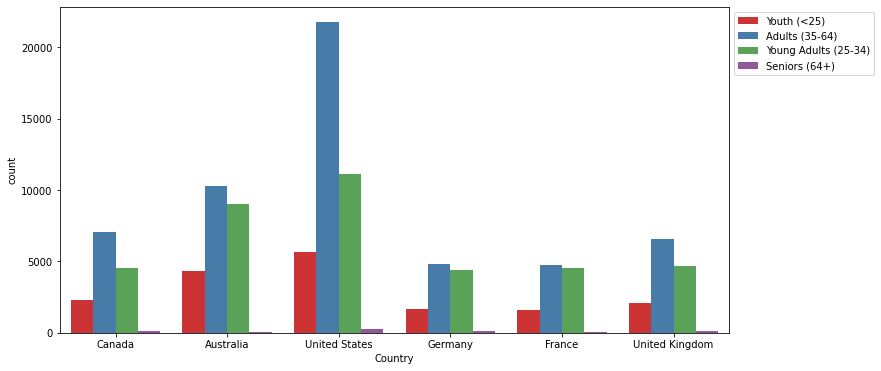

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(df['Country'],hue=df['Age_Group'], palette='Set1')
plt.legend(bbox_to_anchor=(1,1),loc=2)

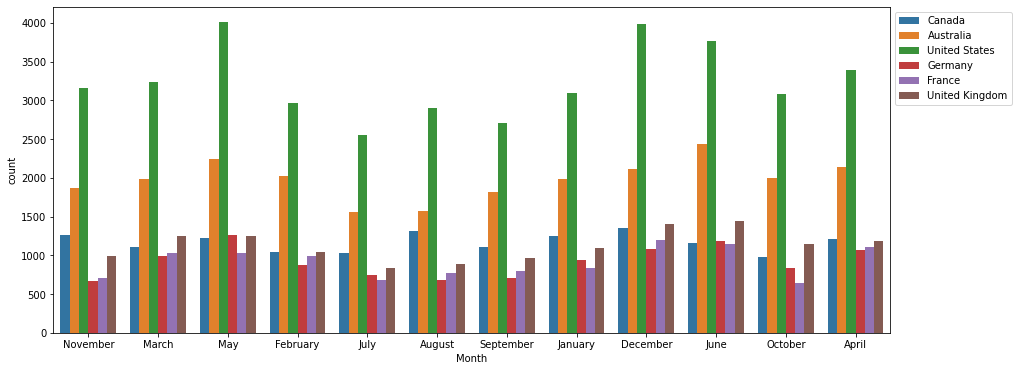

In [25]:
# Check sales by month and country

plt.figure(figsize=(15,6))
sns.countplot(data = df, x='Month', hue='Country')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

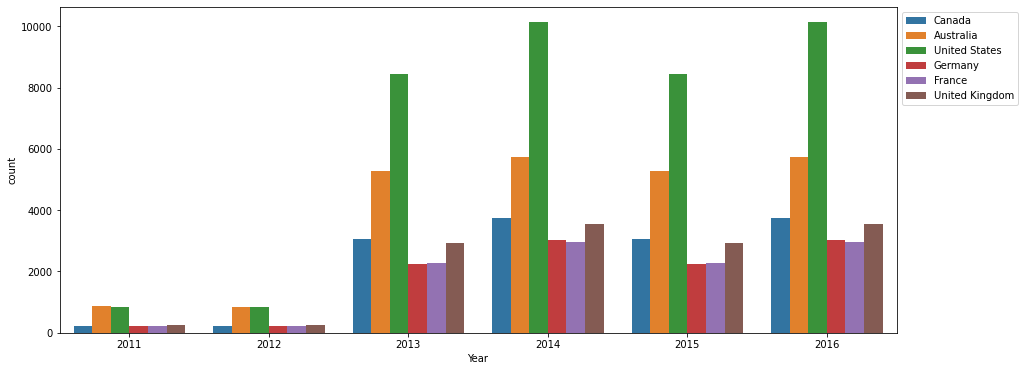

In [26]:
# Check sales by Yeaer and country

plt.figure(figsize=(15,6))
sns.countplot(data = df, x='Year', hue='Country')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:xlabel='Profit'>

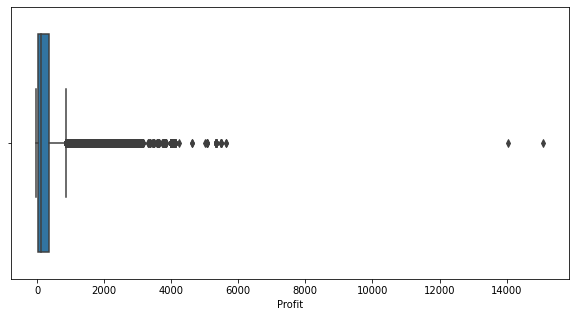

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Profit'])

In [28]:
df[df['Profit']>4000]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
49639,2015-07-07,7,July,2015,61,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-100 Silver, 48",3,1912,3400,4056,5736,9792
50013,2011-03-08,8,March,2011,38,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",4,1266,2320,4030,5064,9094
50903,2011-07-03,3,July,2011,39,Adults (35-64),M,Canada,British Columbia,Bikes,Mountain Bikes,"Mountain-200 Black, 38",4,1252,2295,4080,5008,9088
53173,2011-11-20,20,November,2011,40,Adults (35-64),F,Germany,Bayern,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",4,1266,2320,4123,5064,9187
53199,2011-11-19,19,November,2011,33,Young Adults (25-34),M,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",4,1266,2320,4030,5064,9094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71497,2015-12-23,23,December,2015,44,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",3,2171,3578,4006,6513,10519
71531,2015-08-22,22,August,2015,17,Youth (<25),F,United States,California,Bikes,Road Bikes,"Road-150 Red, 56",3,2171,3578,4006,6513,10519
71555,2011-10-24,24,October,2011,19,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",3,2171,3578,4114,6513,10627
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069


In [29]:
df = df[df['Profit'] <= 4000]

<AxesSubplot:xlabel='Profit'>

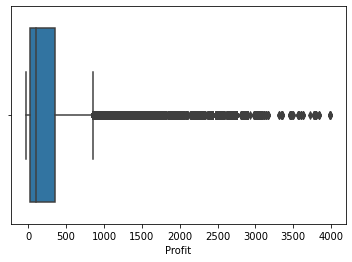

In [30]:
sns.boxplot(df['Profit'])

<AxesSubplot:xlabel='Cost'>

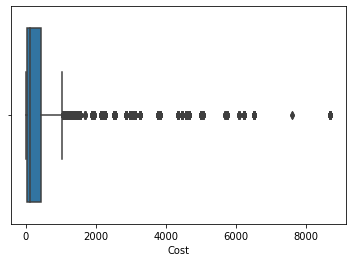

In [31]:
sns.boxplot(df['Cost'])

In [32]:
df[df['Cost'] > 4000]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
49309,2015-12-25,25,December,2015,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",3,1912,3400,2832,5736,8568
49315,2015-02-07,7,February,2015,32,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Black, 48",3,1898,3375,2811,5694,8505
49321,2015-07-04,4,July,2015,33,Young Adults (25-34),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-100 Silver, 48",3,1912,3400,2322,5736,8058
49327,2011-12-20,20,December,2011,33,Young Adults (25-34),F,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-100 Black, 38",4,1898,3375,3073,7592,10665
49347,2015-07-20,20,July,2015,53,Adults (35-64),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",3,1912,3400,2322,5736,8058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112023,2016-05-03,3,May,2016,31,Young Adults (25-34),M,Germany,Nordrhein-Westfalen,Bikes,Touring Bikes,"Touring-1000 Yellow, 50",3,1482,2384,1776,4446,6222
112033,2015-12-07,7,December,2015,31,Young Adults (25-34),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 46",3,1482,2384,2420,4446,6866
112035,2016-02-06,6,February,2016,31,Young Adults (25-34),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 46",3,1482,2384,2420,4446,6866
112065,2015-12-05,5,December,2015,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",3,1482,2384,2420,4446,6866


In [33]:
df = df[df['Cost'] <= 4000]

<AxesSubplot:xlabel='Cost'>

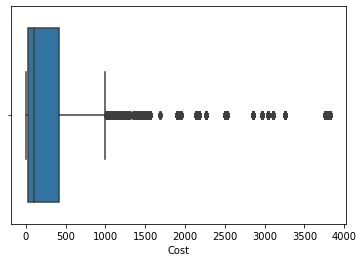

In [34]:
sns.boxplot(df['Cost'])

In [35]:
df.groupby('Year')['Profit'].sum()

Year
2011    1567625
2012    2010897
2013    5898377
2014    5818522
2015    6462669
2016    6333097
Name: Profit, dtype: int64

In [36]:
df.groupby('Year')['Cost'].sum()

Year
2011     3284343
2012     4284796
2013     9164881
2014     8221670
2015    10150788
2016     9158608
Name: Cost, dtype: int64

In [37]:
df[['Profit','Cost']].corr()

,Profit,Cost
Profit,1.000000,0.870611
Cost,0.870611,1.000000


In [38]:
df.drop(columns=['Date','Customer_Age','State','Sub_Category','Product','Order_Quantity','Unit_Cost','Unit_Price','Revenue']
        ,inplace=True)

In [39]:
df.head()

,Day,Month,Year,Age_Group,Customer_Gender,Country,Product_Category,Profit,Cost
0,26,November,2013,Youth (<25),M,Canada,Accessories,590,360
1,26,November,2015,Youth (<25),M,Canada,Accessories,590,360
2,23,March,2014,Adults (35-64),M,Australia,Accessories,1366,1035
3,23,March,2016,Adults (35-64),M,Australia,Accessories,1188,900
4,15,May,2014,Adults (35-64),F,Australia,Accessories,238,180


In [40]:
df['Age_Group'].value_counts()

Adults (35-64)          54553
Young Adults (25-34)    37694
Youth (<25)             17403
Seniors (64+)             717
Name: Age_Group, dtype: int64

In [41]:
def age(x):
    if x == 'Youth (<25)':
        return 'less than 25'
    
    elif x == 'Young Adults (25-34)':
        return 'Between 25 and 34'
    
    elif x == 'Adults (35-64)':
        return 'Between 35 and 64'
    
    elif x == 'Seniors (64+)':
        return 'More than 64'
    
print(age('Youth (<25)'))
print(age('Young Adults (25-34)'))
print(age('Adults (35-64)'))
print(age('Seniors (64+)'))


less than 25
Between 25 and 34
Between 35 and 64
More than 64


In [42]:
df['Age_Group'] = df['Age_Group'].apply(age)

In [43]:
df['Age_Group'].value_counts()

Between 35 and 64    54553
Between 25 and 34    37694
less than 25         17403
More than 64           717
Name: Age_Group, dtype: int64

In [44]:
df.head()

,Day,Month,Year,Age_Group,Customer_Gender,Country,Product_Category,Profit,Cost
0,26,November,2013,less than 25,M,Canada,Accessories,590,360
1,26,November,2015,less than 25,M,Canada,Accessories,590,360
2,23,March,2014,Between 35 and 64,M,Australia,Accessories,1366,1035
3,23,March,2016,Between 35 and 64,M,Australia,Accessories,1188,900
4,15,May,2014,Between 35 and 64,F,Australia,Accessories,238,180


In [45]:
df.dtypes

Day                  int64
Month               object
Year                 int64
Age_Group           object
Customer_Gender     object
Country             object
Product_Category    object
Profit               int64
Cost                 int64
dtype: object

In [46]:
df = pd.get_dummies(df, drop_first=True)

In [47]:
df

,Day,Year,Profit,Cost,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,...,Age_Group_More than 64,Age_Group_less than 25,Customer_Gender_M,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Bikes,Product_Category_Clothing
0,26,2013,590,360,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
1,26,2015,590,360,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,23,2014,1366,1035,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,23,2016,1188,900,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,15,2014,238,180,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,2016,112,72,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
113032,2,2014,655,528,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
113033,2,2016,655,528,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
113034,4,2014,684,576,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  110367
Number of columns:  26


In [49]:
df.columns

Index(['Day', 'Year', 'Profit', 'Cost', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Age_Group_Between 35 and 64',
       'Age_Group_More than 64', 'Age_Group_less than 25', 'Customer_Gender_M',
       'Country_Canada', 'Country_France', 'Country_Germany',
       'Country_United Kingdom', 'Country_United States',
       'Product_Category_Bikes', 'Product_Category_Clothing'],
      dtype='object')

In [50]:
X, Y = df.drop('Profit',axis=1), df['Profit']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [52]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
}

In [55]:
for name, model in models.items():
    
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  
    
    print('-'*30)

Using model: LR
Training Score: 0.7804355563497491
Test Score: 0.779669155451431
------------------------------
Using model: DT
Training Score: 0.9986150594091514
Test Score: 0.9061221937133431
------------------------------
Using model: RF
Training Score: 0.9914114091250614
Test Score: 0.9433246376204564
------------------------------
Using model: XGBR
Training Score: 0.9612733875462076
Test Score: 0.9427761107654551
------------------------------
Using model: KNNR
Training Score: 0.8552488098086548
Test Score: 0.7707805418006837
------------------------------
Using model: SVR
Training Score: 0.5801487016047095
Test Score: 0.5781636185991764
------------------------------


# Randomforest has a high accuracy test ---> best model

Note: outliers in Profit and Cost are not affected in model (in first notebook i removed outliers in two colums by making my data equals two colums in range <= 4000 and in second notebook <=2000) and training and testing still the same result in [DT, RF, XGBR] models, so i used first notebook.

In [54]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(f'Training Score: {RF.score(x_train, y_train)}')
print(f'Test Score: {r2_score(y_test, y_pred)}')  

Training Score: 0.9914427062955913
Test Score: 0.9428808725057742


In [56]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

,y_test,y_pred
5306,59,61.600000
14927,21,17.960000
56145,538,824.150786
88249,13,17.850000
38024,455,450.020000
...,...,...
103095,16,21.900000
102245,23,31.450000
61690,656,753.118056
110826,185,208.360000
